In [ ]:
#created by Henry in NOV 10,2020

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Credit.csv')
#print(dataset)

X = dataset['Income']
X = np.array(X)
#print(X)

y = dataset['Student']
y = np.array(y)
#print(y)

for g in range(y.size):
    if y[g]=='No':
        y[g]=0
    else: y[g]=1
        
#print(y)

     Unnamed: 0   ID   Income  Limit  Rating  Cards  Age  Education  Gender  \
0             1    1   14.891   3606     283      2   34         11    Male   
1             2    2  106.025   6645     483      3   82         15  Female   
2             3    3  104.593   7075     514      4   71         11    Male   
3             4    4  148.924   9504     681      3   36         11  Female   
4             5    5   55.882   4897     357      2   68         16    Male   
..          ...  ...      ...    ...     ...    ...  ...        ...     ...   
395         396  396   12.096   4100     307      3   32         13    Male   
396         397  397   13.364   3838     296      5   65         17    Male   
397         398  398   57.872   4171     321      5   67         12  Female   
398         399  399   37.728   2525     192      1   44         13    Male   
399         400  400   18.701   5524     415      5   64          7  Female   

    Student Married         Ethnicity  Balance  
0 

## Standard Deviation-Normalization and Data Process

In [46]:
std = np.std(X, ddof=1)
mean = np.mean(X)
X = (X - mean) / std

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=None)
#print(X)

## sigmoid function

In [47]:
def sigmoid(s):
    sigma = 1/(1+np.exp(-s))
    return sigma

In [48]:
def model(w,b,X):
    s = w*X+b
    return sigmoid(s)

## cost function(cross entropy)

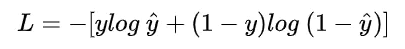

In [49]:
def cost_function(w,b, X, y):
    y_hat = model(w,b, X)
    loss = 0
    for i in range(y.size):
        loss = loss - (y[i]*np.log(y_hat[i])+(1-y[i])*np.log(1-y_hat[i]))
    return loss

## optimizer
references:   
[1]https://zhuanlan.zhihu.com/p/35709485  
[2]https://www.cnblogs.com/xiaoma927/p/9716018.html  

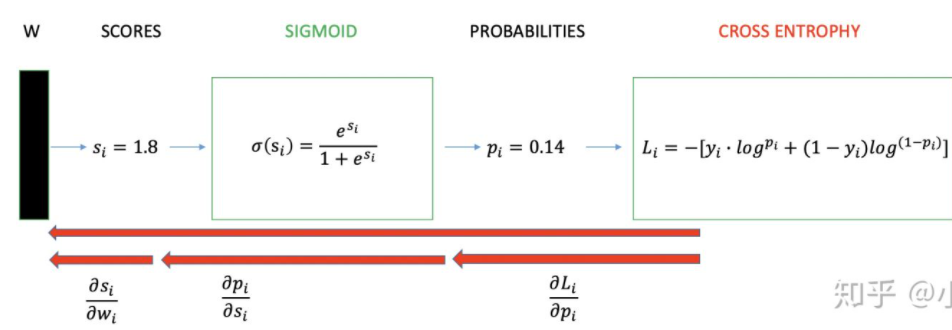

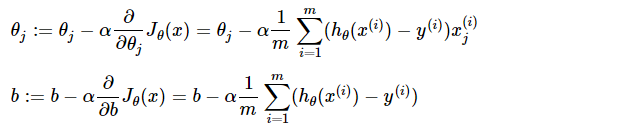

In [50]:
def optimizer(w,b,y,X,alpha):
    dw=0
    db=0
    for i in range(X.size):
        dw=dw+(sigmoid(w*X[i]+b)-y[i])*X[i]
        db=db+(sigmoid(w*X[i]+b)-y[i])
    dw=dw/X.size
    db=db/X.size
    
    return w-alpha*dw,b-alpha*db

## iterator

In [51]:
def iterater(w,b,X,y,times,alpha):
    costs = []
    accs = []
    for i in range(times):
        costs.append(cost_function(w,b, X, y))
        accs.append(accuracy(w,b, X, y))
        w,b = optimizer(w,b,y,X,alpha)
    return w,b, costs, accs

## assessment

In [52]:
def predict_proba(w,b, X):
    y_hat=model(w,b, X)
    return y_hat

def predict(X, w,b):
    y_hat=predict_proba(w,b,X)
    y_hard=(y_hat > 0.5) * 1
    return y_hard

def accuracy(w,b, X, y):
    y_hard=predict(X, w,b)
    count_right = 0
    for i in range(y_hard.size):
        count_right=count_right+(y_hard[i]==y[i])
    return count_right*1.0/y.size

## get the party started

In [53]:
w = 1
b = 1
times = 150
w,b, costs, accs = iterater(w,b,X_train,y_train,times,0.1)
print(w)
print(b)

0.09229305754698894
-1.7942942553369166


## costs descend graph

95.01106209363621 0.8964285714285715


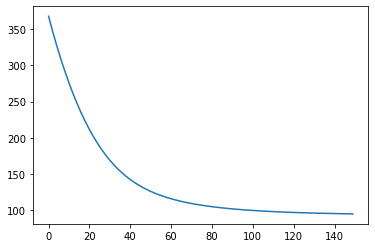

In [54]:
print(costs[-1], accs[-1])

import matplotlib.pyplot as plt
plt.plot(range(times),costs)
plt.show()

## score

In [55]:
accuracy(w,b, X_test, y_test)

0.9083333333333333

## compared with sklearn

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
lr.fit(X_train, y_train.astype('int'))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [57]:
lr.score(X_train, y_train.astype('int'))

0.8964285714285715

In [58]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
test = np.array(range(50))
test=test.reshape(-1,1)
lr.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])